# Project 1: Delivery Time Prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#1. Data Preprocessing:

In [2]:
# Load the Delivery Time dataset
data = pd.read_csv("E:\delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
##calling the read data function
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None
   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [4]:
##preprocessing and feature engineering 
data_copy = data.copy()
print(data_copy)


    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


#2. Exploratory Data Analysis (EDA)

In [5]:
data_copy['Delivery Time'].value_counts()

Delivery Time
21.00    1
10.75    1
17.83    1
8.00     1
18.11    1
13.75    1
14.88    1
12.03    1
11.50    1
16.68    1
19.83    1
13.50    1
18.75    1
17.90    1
9.50     1
19.00    1
15.35    1
29.00    1
24.00    1
19.75    1
21.50    1
Name: count, dtype: int64

In [6]:
data_copy['Sorting Time'].value_counts()

Sorting Time
7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: count, dtype: int64

In [8]:
x = data['Delivery Time']
y = data['Sorting Time']

Text(0, 0.5, 'Sorting Time')

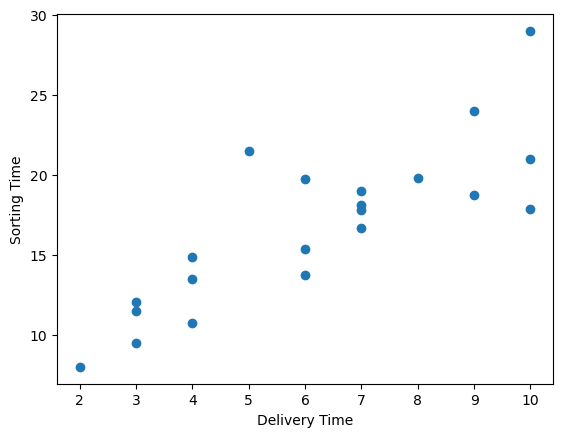

In [62]:
plt.scatter(X,y)
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')


#3. Model Building:

In [33]:
from sklearn.model_selection import train_test_split
X = data ["Sorting Time"]
y = data ["Delivery Time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

In [34]:
X_train 

17     7
10     8
7      3
11     4
12     7
13     3
15     4
18     2
9      9
8     10
6      7
19     7
Name: Sorting Time, dtype: int64

In [ ]:
#as xtrain is an one dimensional array we have to convert it to 2D array usigng reshape

In [37]:
X_train = X_train.values.reshape(-1,1)
X_train
#y_train = y_train.values.reshape(-1,1)

array([[ 7],
       [ 8],
       [ 3],
       [ 4],
       [ 7],
       [ 3],
       [ 4],
       [ 2],
       [ 9],
       [10],
       [ 7],
       [ 7]], dtype=int64)

In [38]:
X_test = X_test.values.reshape(-1,1)
X_test 

array([[10],
       [ 3],
       [ 6],
       [ 4],
       [10],
       [ 6],
       [ 6],
       [ 5],
       [ 9]], dtype=int64)

In [41]:
#Train a simple linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#4. Evaluation and interpretation of the model

In [49]:
m = model.coef_
m

array([1.44290323])

In [51]:
c = model.intercept_
c

6.6903225806451605

In [73]:
r = ("R-squared:", model.score(X_test, y_test))
r

('R-squared:', 0.36359577175330904)

In [55]:
y_pred_train1 = model.predict(X_train)
y_pred_train1

array([16.79064516, 18.23354839, 11.01903226, 12.46193548, 16.79064516,
       11.01903226, 12.46193548,  9.57612903, 19.67645161, 21.11935484,
       16.79064516, 16.79064516])

#Visualize the fitted regression line

Text(0, 0.5, 'Sorting Time')

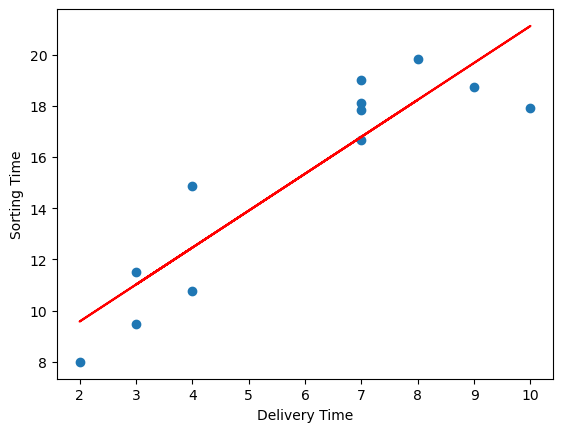

In [74]:

plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred_train1,color='red')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')


#5. Saving the model using JobLib

In [77]:
import joblib
from joblib import dump


In [78]:
# Save the model
dump(model, 'Delivery_Time_Model.joblib')

['Delivery_Time_Model.joblib']

#6.loading the model 

In [79]:
Final_model = joblib.load('Delivery_Time_Model.joblib')
print(Final_model)

LinearRegression()
